In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random
import pickle
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import load_img
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.metrics import Precision,Recall,F1Score






In [2]:
Train_dir="images/train"
Test_dir="images/validation"

In [3]:
def createData(dir):
    image_paths=[]
    labels=[]
    for folder in os.listdir(dir):
        for file in os.listdir(os.path.join(dir,folder)):
            image_paths.append(os.path.join(dir,folder,file))
            labels.append(folder)
        print(folder," Completed")
    return image_paths,labels

In [4]:
train=pd.DataFrame()
train["path"],train["label"]=createData(Train_dir)

happy  Completed
sad  Completed
fear  Completed
surprise  Completed
neutral  Completed
angry  Completed
disgust  Completed


In [5]:
test=pd.DataFrame()
test["path"],test["label"]=createData(Test_dir)

happy  Completed
sad  Completed
fear  Completed
surprise  Completed
neutral  Completed
angry  Completed
disgust  Completed


In [6]:
def extractFeatures(df):
    features=[]
    for path in tqdm(df["path"]):
        img=load_img(path,grayscale=True)
        img=np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return np.array(features)

In [7]:
train_features=extractFeatures(train)

  0%|          | 0/28821 [00:00<?, ?it/s]

/Users/upkarkumarmahto/miniconda3/lib/python3.11/site-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [8]:
test_festures=extractFeatures(test)

  0%|          | 0/7066 [00:00<?, ?it/s]

In [9]:
x_train=train_features/255.0
x_test=test_festures/255.0

In [10]:
label_encoder=LabelEncoder()
label_encoder.fit(train["label"])

LabelEncoder()

In [11]:
y_train=label_encoder.transform(train["label"])
y_test=label_encoder.transform(test["label"])
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [12]:
model=Sequential()
# Convolutional layers(to get the features of the image)
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Flatten the output of convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7,activation="softmax"))



In [13]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy",Precision(),Recall(),F1Score(average='macro')])

In [16]:
history=model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
226/226 [==============================] - 134s 591ms/step - loss: 1.1856 - accuracy: 0.5479 - precision: 0.7419 - recall: 0.3427 - f1_score: 0.4679 - val_loss: 1.1145 - val_accuracy: 0.5900 - val_precision: 0.8026 - val_recall: 0.3515 - val_f1_score: 0.5039
Epoch 2/20
226/226 [==============================] - 134s 591ms/step - loss: 1.1789 - accuracy: 0.5507 - precision: 0.7472 - recall: 0.3515 - f1_score: 0.4689 - val_loss: 1.1247 - val_accuracy: 0.5761 - val_precision: 0.7767 - val_recall: 0.3578 - val_f1_score: 0.5008
Epoch 3/20
226/226 [==============================] - 134s 592ms/step - loss: 1.1630 - accuracy: 0.5585 - precision: 0.7493 - recall: 0.3581 - f1_score: 0.4781 - val_loss: 1.1220 - val_accuracy: 0.5843 - val_precision: 0.7856 - val_recall: 0.3599 - val_f1_score: 0.5210
Epoch 4/20
226/226 [==============================] - 134s 591ms/step - loss: 1.1598 - accuracy: 0.5606 - precision: 0.7500 - recall: 0.3635 - f1_score: 0.4814 - val_loss: 1.1116 - val_accur

In [19]:
modelJson=model.to_json()
with open("model2.json","w") as json_file:
    json_file.write(modelJson)
model.save("model2.h5")

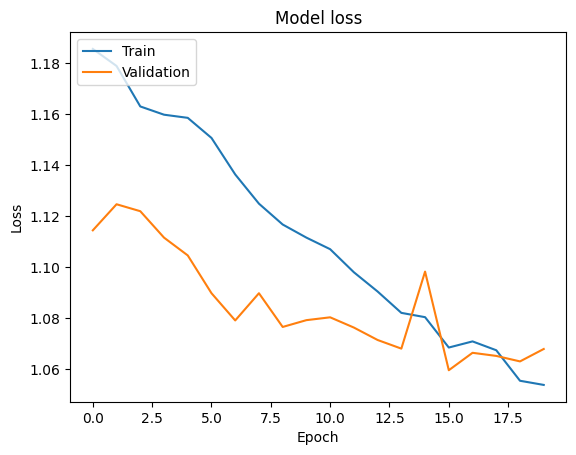

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

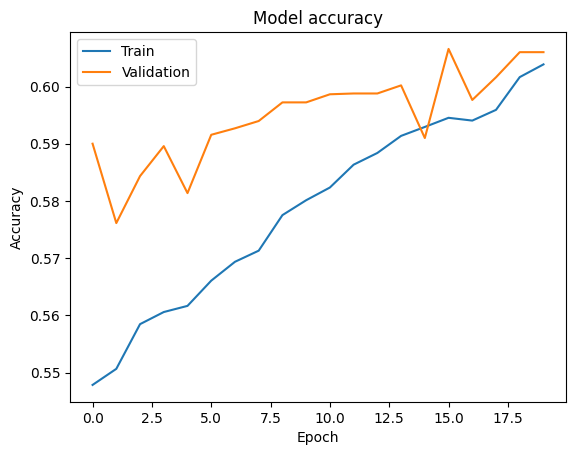

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()